In [1]:
import torch
from torch import nn
import utils
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from d2l import torch as d2l

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [2]:
data_dir_path = Path('../data/house_prices')
train_csv_path = data_dir_path / 'train.csv'
test_csv_path = data_dir_path / 'test.csv'

In [3]:
train_df = pd.read_csv(train_csv_path.as_posix())
test_df = pd.read_csv(test_csv_path.as_posix())
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df_no_id = train_df[train_df.columns[1:]]
train_df_no_id

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train_saleprice_corr = abs(train_df_no_id.corr()['SalePrice']).sort_values(ascending=False)
train_saleprice_corr, train_saleprice_corr.shape

(SalePrice        1.000000
 OverallQual      0.790982
 GrLivArea        0.708624
 GarageCars       0.640409
 GarageArea       0.623431
 TotalBsmtSF      0.613581
 1stFlrSF         0.605852
 FullBath         0.560664
 TotRmsAbvGrd     0.533723
 YearBuilt        0.522897
 YearRemodAdd     0.507101
 GarageYrBlt      0.486362
 MasVnrArea       0.477493
 Fireplaces       0.466929
 BsmtFinSF1       0.386420
 LotFrontage      0.351799
 WoodDeckSF       0.324413
 2ndFlrSF         0.319334
 OpenPorchSF      0.315856
 HalfBath         0.284108
 LotArea          0.263843
 BsmtFullBath     0.227122
 BsmtUnfSF        0.214479
 BedroomAbvGr     0.168213
 KitchenAbvGr     0.135907
 EnclosedPorch    0.128578
 ScreenPorch      0.111447
 PoolArea         0.092404
 MSSubClass       0.084284
 OverallCond      0.077856
 MoSold           0.046432
 3SsnPorch        0.044584
 YrSold           0.028923
 LowQualFinSF     0.025606
 MiscVal          0.021190
 BsmtHalfBath     0.016844
 BsmtFinSF2       0.011378
 

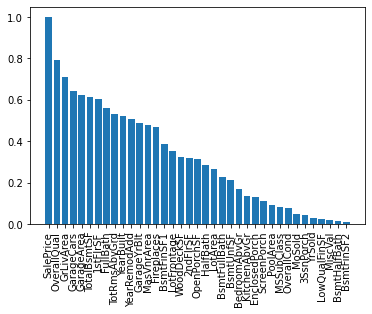

In [7]:
plt.bar(x=train_saleprice_corr.index, height=train_saleprice_corr.values)
plt.xticks(rotation=90)
plt.show()

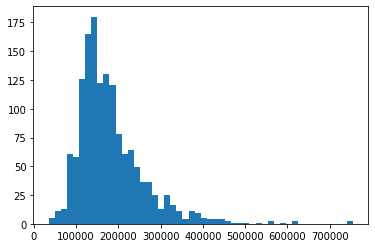

In [8]:
plt.hist(train_df['SalePrice'], bins=50)
plt.show()

In [9]:
# 相关性高的10项，可视化
top_10_name = train_saleprice_corr.index[1:11]
top_10_name

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

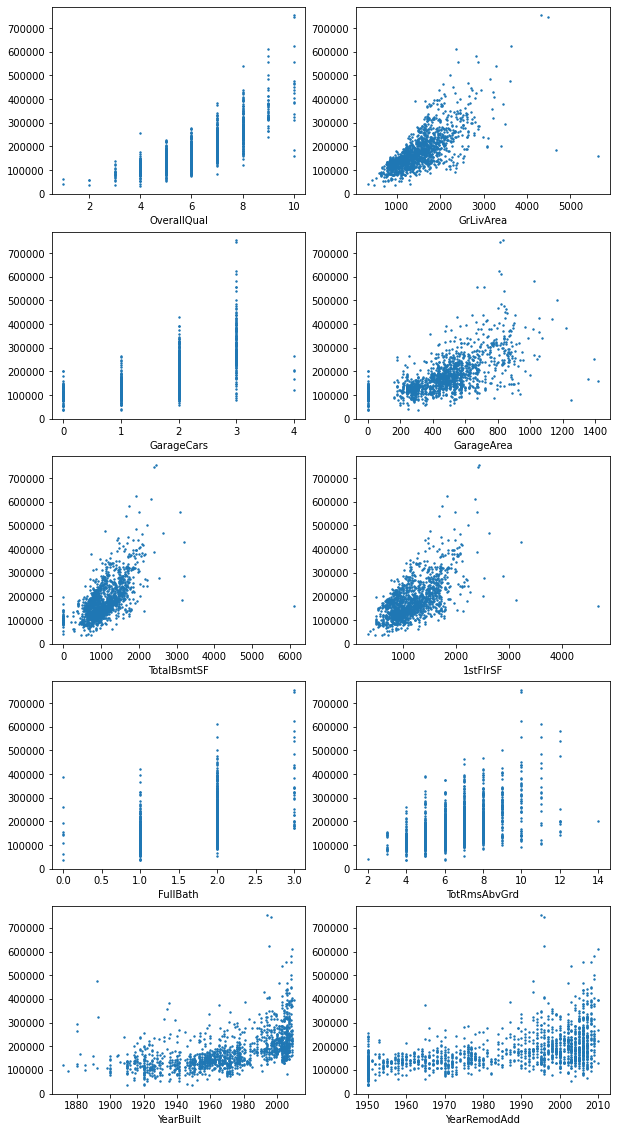

In [10]:
plot_row = 5
plot_col = 2

fig = plt.figure(figsize=(10, 20))
for i in range(plot_row * plot_col):
    plt.subplot(plot_row, plot_col, i+1)
    plt.scatter(x=train_df[top_10_name[i]], y=train_df['SalePrice'], s=2)
    plt.xlabel(top_10_name[i])
plt.show()

In [11]:
# 去除异常值
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>5000) & (train_df['SalePrice']<200000)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF']>4000) & (train_df['SalePrice']<200000)].index)
train_df.shape

(1458, 81)

In [12]:
all_df = pd.concat([train_df.iloc[:, 1:-1], test_df.iloc[:, 1:]], axis=0)
all_df.shape

(2917, 79)

In [13]:
all_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2917.000000,2431.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2894.000000,2916.000000,2916.000000,...,2916.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,57.135756,69.180584,10139.439150,6.086390,5.564964,1971.287967,1984.248200,101.733587,439.015432,49.616255,...,472.409465,93.629414,47.280082,23.114158,2.604045,16.073363,2.088790,50.860816,6.213576,2007.792938
std,42.532140,22.791719,7807.036512,1.406704,1.113414,30.286991,20.892257,178.510291,444.182329,169.258662,...,214.620878,126.532643,67.118965,64.263424,25.196714,56.202054,34.561371,567.595198,2.713070,1.315328
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7476.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [15]:
# 数值数据标准化
numeric_feature_name = all_df.dtypes[all_df.dtypes != 'object'].index
all_df[numeric_feature_name] = np.log(all_df[numeric_feature_name] + 1)
# all_df[numeric_feature_name] = all_df[numeric_feature_name].apply(lambda x:(x - x.mean())/x.std())
all_df[numeric_feature_name] = (
    all_df[numeric_feature_name] - all_df[numeric_feature_name].mean()
) / all_df[numeric_feature_name].std()
# 标准化后，缺失值填充0
all_df[numeric_feature_name] = all_df[numeric_feature_name].fillna(0)

In [16]:
all_df = pd.get_dummies(all_df, dummy_na=True, dtype=int)
all_df.shape

(2917, 330)

In [17]:
n_train = train_df.shape[0]
train_data = torch.tensor(all_df.iloc[:n_train].values, dtype=torch.float32)
test_data = torch.tensor(all_df.iloc[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(train_df['SalePrice'].values.reshape(-1, 1), dtype=torch.float32)

In [18]:
train_data.shape, test_data.shape

(torch.Size([1458, 330]), torch.Size([1459, 330]))

In [19]:
loss = nn.MSELoss()
in_features = train_data.shape[1]

In [20]:
dropout_1 = 0.1

def get_net():
    net = nn.Sequential(
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.Dropout(dropout_1),
        nn.Linear(512, 1),
    )
    return net

In [21]:
def log_rmse(net, x, y):
    """取对数，得到均方根误差"""
    # 对y值设置上限和下限
    # y_hat = torch.clamp(net(x), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(net(x) + 1), torch.log(y + 1)))
    rmse.requires_grad_(True)
    return rmse

In [22]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = utils.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            # l = loss(net(X), y)
            l = log_rmse(net, X, y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels).item())
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels).item())
    return train_ls, test_ls

In [23]:
def get_k_fold_data(k, i, X, y):
    """
        k折交叉验证
    """
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [24]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse: {float(train_ls[-1]):f}, '
              f'验证log rmse: {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

折1，训练log rmse: 0.110874, 验证log rmse: 0.129206
折2，训练log rmse: 0.107343, 验证log rmse: 0.132471
折3，训练log rmse: 0.101876, 验证log rmse: 0.134317
折4，训练log rmse: 0.106921, 验证log rmse: 0.119459
折5，训练log rmse: 0.104608, 验证log rmse: 0.126634
5折平均训练log rmse: 0.106324, 平均验证log rmse: 0.128417


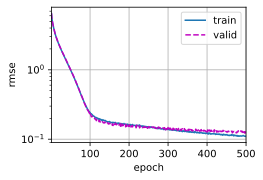

In [63]:
# k, num_epochs, lr, weight_decay, batch_size = 5, 500, 0.02, 1500, 128
k, num_epochs, lr, weight_decay, batch_size = 5, 500, 0.01, 2e-7, 64
train_l, valid_l = k_fold(k, train_data, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}折平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [64]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(list(range(1, num_epochs + 1)), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv((data_dir_path / 'submission.csv').as_posix(), index=False)

训练log rmse：0.100446


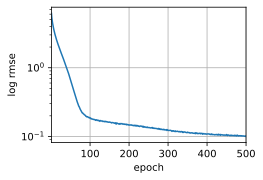

In [65]:
train_and_pred(train_data, test_data, train_labels, test_df,
               num_epochs, lr, weight_decay, batch_size)